Importando bibliotecas pandas e matplot utilizadas para manipular dados de tabelas e exibição de graficos


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Exibindo a tabela de dados onde serão apresentados as informações contundentes


```
# Isto está formatado como código
```



In [ ]:
df = pd.read_csv('/content/Projeto Cursos 1.csv', sep=';', encoding='cp1252')
df.head()

,Data,Ano,Mês,Vendedor,Cliente,Região,Produto,Valor,Total de vendas
0,01/01/2019,2019,jan,Paulo,Thamires Bastos,Sudeste,Python,"R$ 450,00","R$ 1.696.050,00"
1,01/01/2019,2019,jan,Paulo,Jessika Mineiro,Centro-Oeste,Excel,"R$ 500,00",NaN
2,02/01/2019,2019,jan,Diego,Glenda Jalles,Norte,VBA,"R$ 600,00",NaN
3,02/01/2019,2019,jan,Diego,Eugênio Mattos,Sul,Python,"R$ 450,00",NaN
4,02/01/2019,2019,jan,Alon,Yasmine Gomes,Norte,VBA,"R$ 600,00",NaN


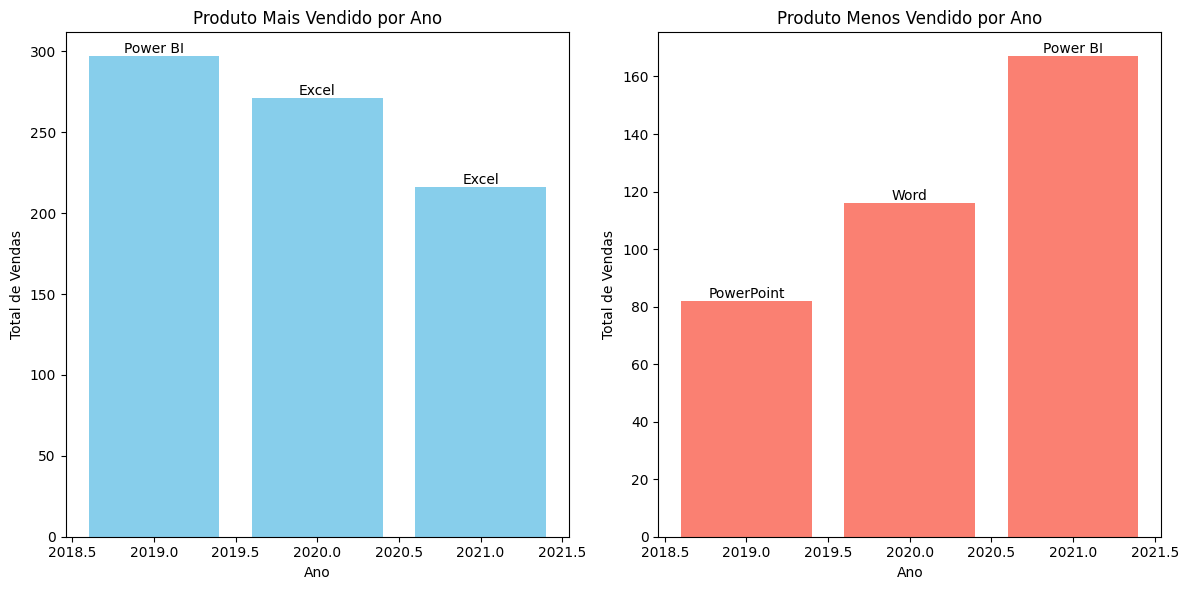

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
dados = pd.read_csv('/content/Projeto Cursos 1.csv', sep=';', encoding='cp1252')

# Extrair o ano dos dados de data (usando o formato "dia/mês/ano")
dados['Ano'] = pd.to_datetime(dados['Data'], format='%d/%m/%Y').dt.year

# Agrupar os dados por ano e produto e contar o número de vendas de cada produto
vendas_por_ano_produto = dados.groupby(['Ano', 'Produto']).size().reset_index(name='Total de Vendas')

# Encontrar o produto mais vendido e o menos vendido por ano
produto_mais_vendido_por_ano = vendas_por_ano_produto.loc[vendas_por_ano_produto.groupby('Ano')['Total de Vendas'].idxmax()]
produto_menos_vendido_por_ano = vendas_por_ano_produto.loc[vendas_por_ano_produto.groupby('Ano')['Total de Vendas'].idxmin()]

# Plotar o gráfico de barras para o produto mais vendido por ano
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(produto_mais_vendido_por_ano['Ano'], produto_mais_vendido_por_ano['Total de Vendas'], color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.title('Produto Mais Vendido por Ano')

# Adicionar os nomes dos produtos como rótulos
for i, row in produto_mais_vendido_por_ano.iterrows():
    plt.text(row['Ano'], row['Total de Vendas'], row['Produto'], ha='center', va='bottom')

# Plotar o gráfico de barras para o produto menos vendido por ano
plt.subplot(1, 2, 2)
plt.bar(produto_menos_vendido_por_ano['Ano'], produto_menos_vendido_por_ano['Total de Vendas'], color='salmon')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.title('Produto Menos Vendido por Ano')

# Adicionar os nomes dos produtos como rótulos
for i, row in produto_menos_vendido_por_ano.iterrows():
    plt.text(row['Ano'], row['Total de Vendas'], row['Produto'], ha='center', va='bottom')

plt.tight_layout()
plt.show()



<Figure size 1200x600 with 0 Axes>

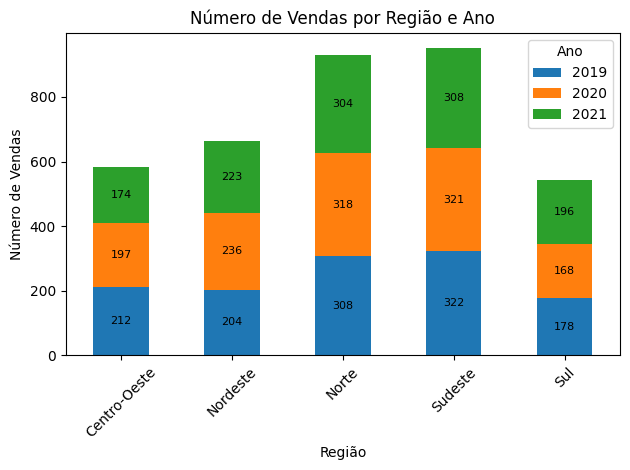

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
dados = pd.read_csv('/content/Projeto Cursos 1.csv', sep=';', encoding='cp1252')

# Extrair o ano dos dados de data (usando o formato "dia/mês/ano")
dados['Ano'] = pd.to_datetime(dados['Data'], format='%d/%m/%Y').dt.year

# Agrupar os dados por região e ano e calcular o número de vendas
vendas_por_regiao_ano = dados.groupby(['Região', 'Ano']).size().unstack(fill_value=0)

# Plotar o gráfico de barras agrupadas por região e ano
plt.figure(figsize=(12, 6))
barras = vendas_por_regiao_ano.plot(kind='bar', stacked=True)

# Adicionar os rótulos de dados nas barras
for i, bar in enumerate(barras.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + bar.get_height() / 2
    label = int(bar.get_height())
    plt.text(x, y, label, ha='center', va='center', fontsize=8)

plt.xlabel('Região')
plt.ylabel('Número de Vendas')
plt.title('Número de Vendas por Região e Ano')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()


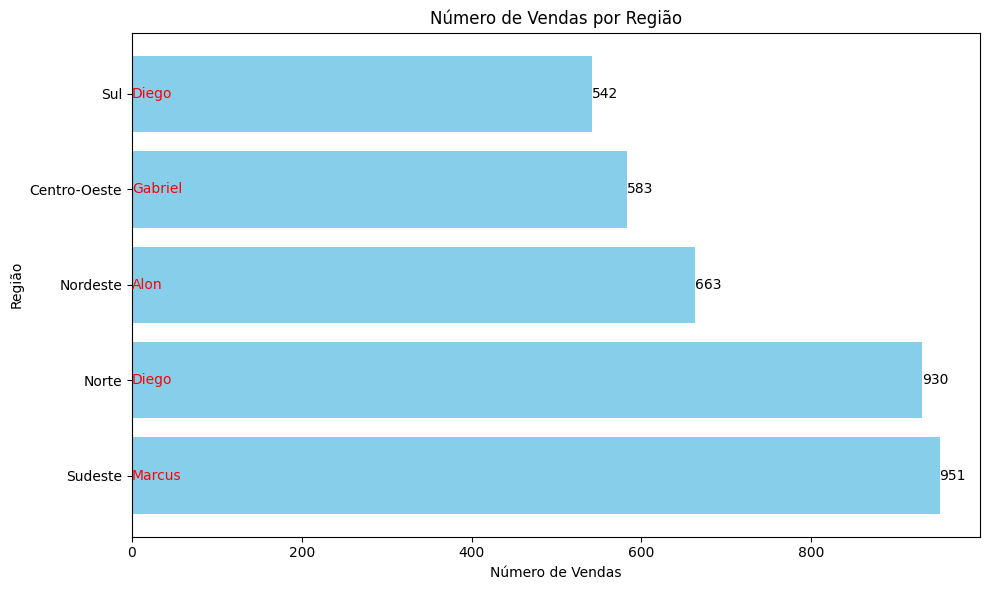

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
dados = pd.read_csv('/content/Projeto Cursos 1.csv', sep=';', encoding='cp1252')

# Agrupar os dados por região e calcular o número de vendas
vendas_por_regiao = dados['Região'].value_counts()

# Encontrar o vendedor que mais vendeu em cada região
vendedor_mais_vendido_por_regiao = dados.groupby(['Região', 'Vendedor']).size().reset_index(name='Número de Vendas').sort_values(by=['Região', 'Número de Vendas'], ascending=[True, False]).drop_duplicates(subset='Região')

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
barras = plt.barh(vendas_por_regiao.index, vendas_por_regiao, color='skyblue')
plt.xlabel('Número de Vendas')
plt.ylabel('Região')
plt.title('Número de Vendas por Região')

# Adicionar os rótulos de dados nas barras
for i, v in enumerate(vendas_por_regiao):
    plt.text(v, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Adicionar os nomes dos vendedores na reta vertical
for i, vendedor in enumerate(vendedor_mais_vendido_por_regiao['Vendedor']):
    plt.text(0.1, i, vendedor, color='red', fontsize=10, ha='left', va='center')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

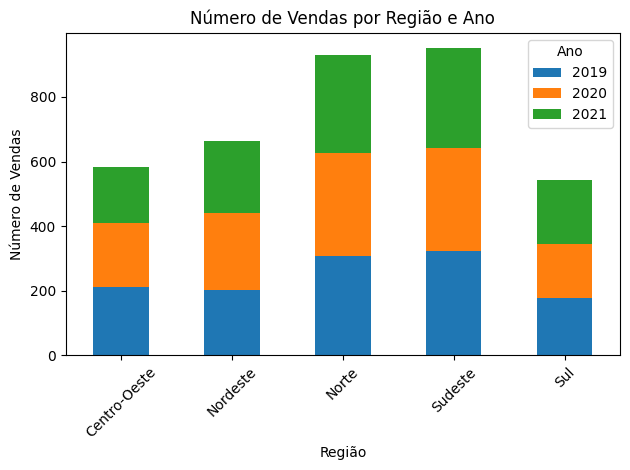

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
dados = pd.read_csv('/content/Projeto Cursos 1.csv', sep=';', encoding='cp1252')

# Extrair o ano dos dados de data (usando o formato "dia/mês/ano")
dados['Ano'] = pd.to_datetime(dados['Data'], format='%d/%m/%Y').dt.year

# Agrupar os dados por região e ano e calcular o número de vendas
vendas_por_regiao_ano = dados.groupby(['Região', 'Ano']).size().unstack(fill_value=0)

# Plotar o gráfico de barras agrupadas por região e ano
plt.figure(figsize=(12, 6))
vendas_por_regiao_ano.plot(kind='bar', stacked=True)
plt.xlabel('Região')
plt.ylabel('Número de Vendas')
plt.title('Número de Vendas por Região e Ano')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()


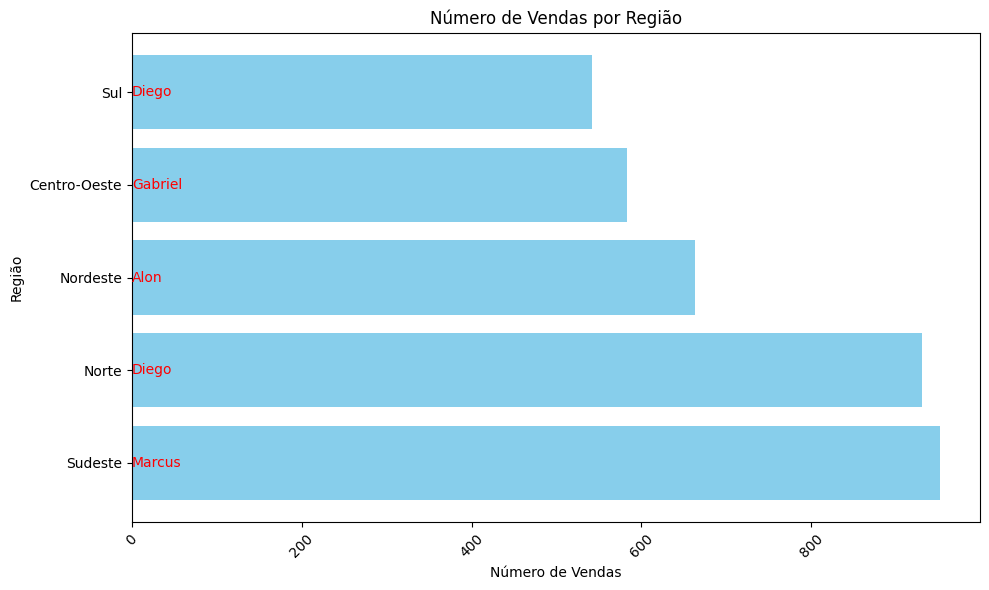

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
dados = pd.read_csv('/content/Projeto Cursos 1.csv', sep=';', encoding='cp1252')

# Contar o número de vendas por vendedor e região
vendas_por_vendedor_e_regiao = dados.groupby(['Vendedor', 'Região']).size().reset_index(name='Número de Vendas')

# Encontrar o vendedor que mais vendeu em cada região
vendedor_mais_vendido_por_regiao = vendas_por_vendedor_e_regiao.loc[vendas_por_vendedor_e_regiao.groupby('Região')['Número de Vendas'].idxmax()]

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(range(len(vendas_por_regiao)), vendas_por_regiao, color='skyblue')
plt.xlabel('Número de Vendas')
plt.ylabel('Região')
plt.title('Número de Vendas por Região')
plt.yticks(range(len(vendas_por_regiao)), vendas_por_regiao.index)
plt.xticks(rotation=45)
plt.tight_layout()

# Adicionar os nomes dos vendedores na reta vertical
for i, vendedor in enumerate(vendedor_mais_vendido_por_regiao['Vendedor']):
    plt.text(0.1, i, vendedor, color='red', fontsize=10, ha='left', va='center')

plt.show()


In [ ]:
# Carregar os dados do arquivo CSV
dados = pd.read_csv('/content/Projeto Cursos 1.csv', sep=';', encoding='cp1252')

# Visualizar as primeiras linhas dos dados para garantir que foram carregados corretamente
print(dados.head())



         Data   Ano  Mês Vendedor          Cliente        Região Produto  \
0  01/01/2019  2019  jan    Paulo  Thamires Bastos       Sudeste  Python   
1  01/01/2019  2019  jan    Paulo  Jessika Mineiro  Centro-Oeste   Excel   
2  02/01/2019  2019  jan    Diego    Glenda Jalles         Norte     VBA   
3  02/01/2019  2019  jan    Diego   Eugênio Mattos           Sul  Python   
4  02/01/2019  2019  jan     Alon    Yasmine Gomes         Norte     VBA   

       Valor  Total de vendas  
0  R$ 450,00  R$ 1.696.050,00  
1  R$ 500,00              NaN  
2  R$ 600,00              NaN  
3  R$ 450,00              NaN  
4  R$ 600,00              NaN  


In [ ]:
# Agrupar os dados e calcular o total de vendas
dados_agrupados = dados.groupby(['Vendedor', 'Região', 'Ano', 'Mês', 'Produto'])['Valor'].sum().reset_index()

# Visualizar as primeiras linhas dos dados agrupados
print(dados_agrupados.head())


  Vendedor        Região   Ano  Mês   Produto                        Valor
0     Alon  Centro-Oeste  2019  abr     Excel                    R$ 500,00
1     Alon  Centro-Oeste  2019  abr  Power BI           R$ 300,00R$ 300,00
2     Alon  Centro-Oeste  2019  abr       VBA           R$ 600,00R$ 600,00
3     Alon  Centro-Oeste  2019  ago     Excel                    R$ 500,00
4     Alon  Centro-Oeste  2019  ago  Power BI  R$ 300,00R$ 300,00R$ 300,00


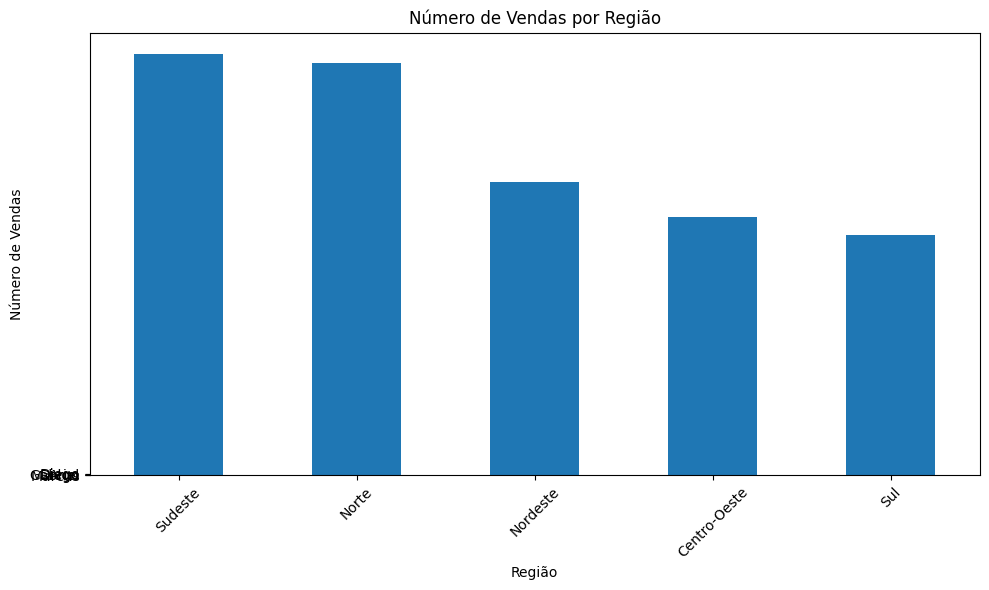

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
dados = pd.read_csv('/content/Projeto Cursos 1.csv', sep=';', encoding='cp1252')

# Contar o número de vendas por vendedor e região
vendas_por_vendedor_e_regiao = dados.groupby(['Vendedor', 'Região']).size().reset_index(name='Número de Vendas')

# Encontrar o vendedor que mais vendeu em cada região
vendedor_mais_vendido_por_regiao = vendas_por_vendedor_e_regiao.loc[vendas_por_vendedor_e_regiao.groupby('Região')['Número de Vendas'].idxmax()]

# Plotar o gráfico
plt.figure(figsize=(10, 6))
vendas_por_regiao.plot(kind='bar')
plt.xlabel('Região')
plt.ylabel('Número de Vendas'),('Vendedor')
plt.title('Número de Vendas por Região')
plt.xticks(rotation=45)
plt.yticks(range(len(vendedor_mais_vendido_por_regiao)), vendedor_mais_vendido_por_regiao['Vendedor'])
plt.tight_layout()
plt.show()


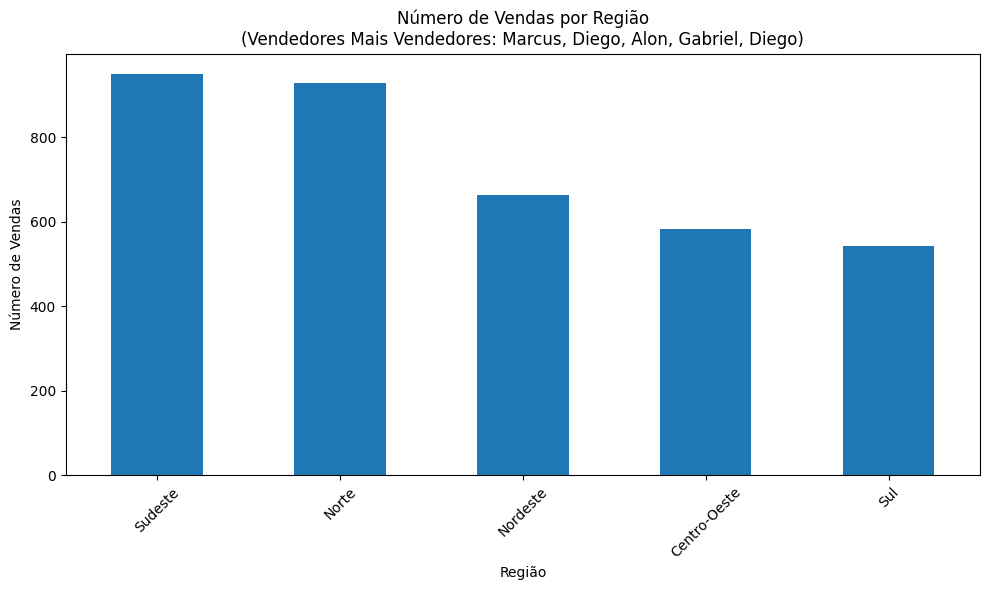

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
dados = pd.read_csv('/content/Projeto Cursos 1.csv', sep=';', encoding='cp1252')

# Contar o número de vendas por vendedor e região
vendas_por_vendedor_e_regiao = dados.groupby(['Vendedor', 'Região']).size().reset_index(name='Número de Vendas')

# Encontrar o vendedor que mais vendeu em cada região
vendedor_mais_vendido_por_regiao = vendas_por_vendedor_e_regiao.loc[vendas_por_vendedor_e_regiao.groupby('Região')['Número de Vendas'].idxmax()]

# Plotar o gráfico
plt.figure(figsize=(10, 6))
vendas_por_regiao.plot(kind='bar')
plt.xlabel('Região')
plt.ylabel('Número de Vendas')
plt.title('Número de Vendas por Região\n(Vendedores Mais Vendedores: {})'.format(', '.join(vendedor_mais_vendido_por_regiao['Vendedor'])))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


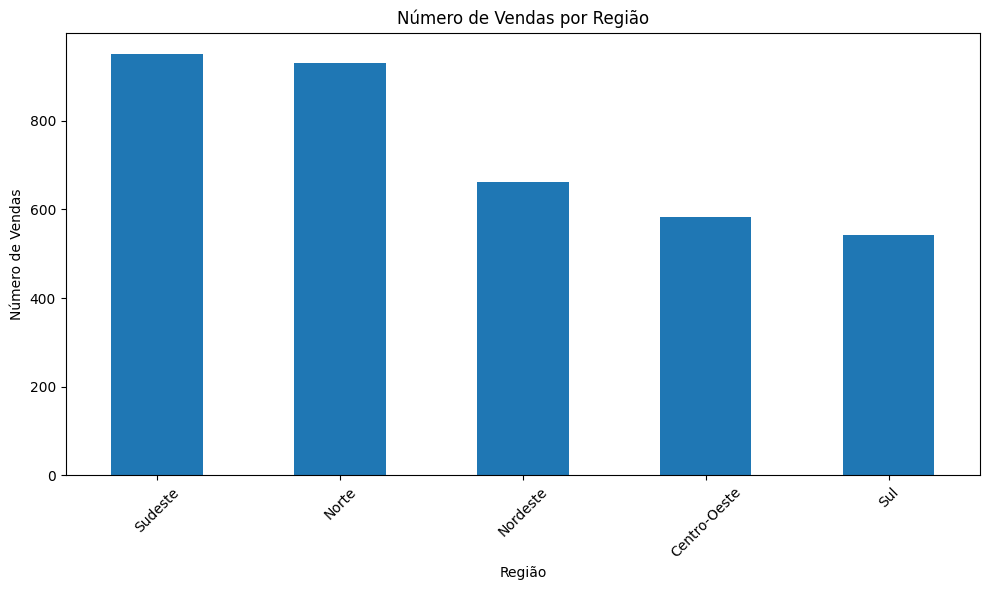

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
dados = pd.read_csv('/content/Projeto Cursos 1.csv', sep=';', encoding='cp1252')

# Contar o número de vendas por região
vendas_por_regiao = dados['Região'].value_counts()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
vendas_por_regiao.plot(kind='bar')
plt.xlabel('Região')
plt.ylabel('Número de Vendas')
plt.title('Número de Vendas por Região')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Tratando dados da tabela selecionado, coluna 'Valor' retirando o caractere R$ para exibição do mesmo!

In [ ]:
df['Valor'] = df['Valor'].str.replace('[^\d.]', '', regex=True).astype(float)

Exibindo qual foi o produto que mais vendeu no ano de 2019

In [ ]:
# Defina o ano desejado
ano_desejado = 2019  # Substitua pelo ano que você deseja filtrar

# Filtrar o DataFrame para incluir apenas as vendas do ano desejado
vendas_ano_desejado = df[df['Ano'] == ano_desejado]

# Obtenha o índice da maior venda no ano desejado
indice_maior_venda = vendas_ano_desejado['Valor'].idxmax()

# Obtenha o valor da maior venda no ano desejado
maior_venda_ano_desejado = vendas_ano_desejado.loc[indice_maior_venda, 'Valor']

# Obtenha o nome do produto da maior venda no ano desejado
produto_maior_venda = vendas_ano_desejado.loc[indice_maior_venda, 'Produto']

# Exiba o nome do produto junto com o valor da maior venda no ano desejado
print("Produto da maior venda em", ano_desejado, ":", produto_maior_venda)


Produto da maior venda em 2019 : VBA


In [ ]:
# Defina o ano desejado
ano_desejado = 2021

# Filtrar o DataFrame para incluir apenas as vendas do ano desejado
vendas_ano_desejado = df[df['Ano'] == ano_desejado]

# Agrupar as vendas pelo vendedor e contar o número de vendas de cada vendedor
vendas_por_vendedor = vendas_ano_desejado.groupby('Vendedor').size()

# Encontrar o vendedor que teve mais vendas
vendedor_mais_vendas = vendas_por_vendedor.idxmax()
quantidade_vendas_vendedor = vendas_por_vendedor.max()

# Exibir o vendedor que vendeu mais produtos e a quantidade de vendas
print("Vendedor que vendeu mais produtos em", ano_desejado, ": ", vendedor_mais_vendas)
print("Quantidade de vendas:", quantidade_vendas_vendedor)


Vendedor que vendeu mais produtos em 2021 :  João
Quantidade de vendas: 237


In [ ]:
# Agrupar as vendas pelo vendedor e pelo produto, contando o número de vendas de cada produto de cada vendedor
vendas_por_vendedor_produto = vendas_ano_desejado.groupby(['Vendedor', 'Produto']).size().reset_index(name='Quantidade')

# Encontrar o produto que o vendedor mais vendeu
produto_mais_vendido_vendedor = vendas_por_vendedor_produto[vendas_por_vendedor_produto['Vendedor'] == vendedor_mais_vendas].sort_values(by='Quantidade', ascending=False).iloc[0]

# Encontrar o produto que o vendedor menos vendeu
produto_menos_vendido_vendedor = vendas_por_vendedor_produto[vendas_por_vendedor_produto['Vendedor'] == vendedor_mais_vendas].sort_values(by='Quantidade', ascending=True).iloc[0]

# Exibir o produto que o vendedor mais vendeu e a quantidade de vendas
print("Produto mais vendido pelo vendedor", vendedor_mais_vendas, "em", ano_desejado, ": ", produto_mais_vendido_vendedor['Produto'])
print("Quantidade de vendas:", produto_mais_vendido_vendedor['Quantidade'])

# Exibir o produto que o vendedor menos vendeu e a quantidade de vendas
print("\nProduto menos vendido pelo vendedor", vendedor_mais_vendas, "em", ano_desejado, ": ", produto_menos_vendido_vendedor['Produto'])
print("Quantidade de vendas:", produto_menos_vendido_vendedor['Quantidade'])


NameError: name 'vendas_ano_desejado' is not defined

In [ ]:
# Agrupar as vendas pela região e pelo produto, contando o número de vendas de cada produto em cada região
vendas_por_regiao_produto = df.groupby(['Região', 'Produto']).size().reset_index(name='Quantidade')

# Encontrar o produto menos vendido em cada região
produtos_menos_vendidos_por_regiao = vendas_por_regiao_produto.groupby('Região').apply(lambda x: x.loc[x['Quantidade'].idxmin()])

# Exibir o produto menos vendido em cada região
for index, row in produtos_menos_vendidos_por_regiao.iterrows():
    print("Produto menos vendido na região", row['Região'], ": ", row['Produto'])
    print("Quantidade de vendas:", row['Quantidade'])
    print()


Produto menos vendido na região Centro-Oeste :  Word
Quantidade de vendas: 68

Produto menos vendido na região Nordeste :  VBA
Quantidade de vendas: 62

Produto menos vendido na região Norte :  PowerPoint
Quantidade de vendas: 95

Produto menos vendido na região Sudeste :  PowerPoint
Quantidade de vendas: 76

Produto menos vendido na região Sul :  Excel
Quantidade de vendas: 53



In [ ]:
# Agrupar as vendas pela região e pelo vendedor, contando o número de vendas de cada vendedor em cada região
vendas_por_regiao_vendedor = df.groupby(['Região', 'Vendedor']).size().reset_index(name='Quantidade')

# Encontrar o vendedor que vendeu mais em cada região
vendedor_mais_vendas_por_regiao = vendas_por_regiao_vendedor.groupby('Região').apply(lambda x: x.loc[x['Quantidade'].idxmax()])

# Exibir o vendedor que vendeu mais em cada região
for index, row in vendedor_mais_vendas_por_regiao.iterrows():
    print("Vendedor que vendeu mais na região", row['Região'], ": ", row['Vendedor'])
    print("Quantidade de vendas:", row['Quantidade'])
    print()


Vendedor que vendeu mais na região Centro-Oeste :  Marcus
Quantidade de vendas: 110

Vendedor que vendeu mais na região Nordeste :  Diego
Quantidade de vendas: 126

Vendedor que vendeu mais na região Norte :  Alon
Quantidade de vendas: 173

Vendedor que vendeu mais na região Sudeste :  Gabriel
Quantidade de vendas: 180

Vendedor que vendeu mais na região Sul :  Diego
Quantidade de vendas: 101



In [ ]:
# Defina o ano desejado
ano_desejado = 2020  # Substitua pelo ano que você deseja filtrar

# Filtrar o DataFrame para incluir apenas as vendas do ano desejado
vendas_ano_desejado = df[df['Ano'] == ano_desejado]

# Agrupar as vendas pelo ano, região e vendedor, contando o número de vendas de cada vendedor em cada região no ano desejado
vendas_por_ano_regiao_vendedor = vendas_ano_desejado.groupby(['Ano', 'Região', 'Vendedor']).size().reset_index(name='Quantidade')

# Encontrar o vendedor que vendeu mais em cada região no ano desejado
vendedor_mais_vendas_por_regiao_ano = vendas_por_ano_regiao_vendedor.groupby(['Ano', 'Região']).apply(lambda x: x.loc[x['Quantidade'].idxmax()])

# Exibir o vendedor que vendeu mais em cada região no ano desejado
for index, row in vendedor_mais_vendas_por_regiao_ano.iterrows():
    print("Vendedor que vendeu mais na região", row['Região'], "no ano", ano_desejado, ": ", row['Vendedor'])
    print("Quantidade de vendas:", row['Quantidade'])
    print()


Vendedor que vendeu mais na região Centro-Oeste no ano 2020 :  Alon
Quantidade de vendas: 43

Vendedor que vendeu mais na região Nordeste no ano 2020 :  Diego
Quantidade de vendas: 49

Vendedor que vendeu mais na região Norte no ano 2020 :  Paulo
Quantidade de vendas: 59

Vendedor que vendeu mais na região Sudeste no ano 2020 :  Paulo
Quantidade de vendas: 70

Vendedor que vendeu mais na região Sul no ano 2020 :  Diego
Quantidade de vendas: 35



In [ ]:
# Dicionário de mapeamento de abreviações de meses para nomes completos
mapa_meses = {
    'jan': 'Janeiro',
    'fev': 'Fevereiro',
    'mar': 'Março',
    'abr': 'Abril',
    'mai': 'Maio',
    'jun': 'Junho',
    'jul': 'Julho',
    'ago': 'Agosto',
    'set': 'Setembro',
    'out': 'Outubro',
    'nov': 'Novembro',
    'dez': 'Dezembro'
}

# Converta as abreviações dos meses para os nomes completos dos meses
df['Mês'] = df['Mês'].map(mapa_meses)

# Defina o ano e o mês desejados
ano_desejado = 2020  # Substitua pelo ano que você deseja filtrar
mes_desejado = 'Fevereiro'  # Substitua pelo mês que você deseja filtrar
regiao_desejada = 'Sul'  # Substitua pela região que você deseja filtrar

# Filtrar o DataFrame para incluir apenas as vendas do ano, do mês e da região desejados
vendas_filtradas = df[(df['Ano'] == ano_desejado) & (df['Mês'] == mes_desejado) & (df['Região'] == regiao_desejada)]

# Verificar se há dados disponíveis para o ano, mês e região selecionados
if vendas_filtradas.empty:
    print("Não há dados disponíveis para o ano", ano_desejado, ", o mês", mes_desejado, "e a região", regiao_desejada)
else:
    # Agrupar as vendas pelo ano, mês, região e vendedor, contando o número de vendas de cada vendedor na região no ano e mês desejados
    vendas_por_regiao_vendedor = vendas_filtradas.groupby(['Ano', 'Mês', 'Região', 'Vendedor']).size().reset_index(name='Quantidade')

    # Encontrar o vendedor que vendeu mais na região no ano e mês desejados
    vendedor_mais_vendas_por_regiao = vendas_por_regiao_vendedor.loc[vendas_por_regiao_vendedor.groupby(['Ano', 'Mês', 'Região'])['Quantidade'].idxmax()]

    # Exibir o vendedor que vendeu mais na região no ano e mês desejados
    for index, row in vendedor_mais_vendas_por_regiao.iterrows():
        print("Vendedor que vendeu mais na região", row['Região'], "no ano", row['Ano'], "e mês", row['Mês'], ": ", row['Vendedor'])
        print("Quantidade de vendas:", row['Quantidade'])
        print()


Vendedor que vendeu mais na região Sul no ano 2020 e mês Fevereiro :  Diego
Quantidade de vendas: 3



In [ ]:
mapa_meses = {'jan': 'Janeiro',
  'fev': 'Fevereiro',
  'mar': 'Março', 'abr': 'Abril', 'mai': 'Maio', 'jun': 'Junho', 'jul': 'Julho', 'ago': 'Agosto', 'set': 'Setembro', 'out': 'Outubro', 'nov': 'Novembro', 'dez': 'Dezembro'}
df['Mês'] = df['Mês'].map(mapa_meses)
ano_desejado, mes_desejado, regiao_desejada = 2020, 'Fevereiro', 'Sul'
vendas_filtradas = df[(df['Ano'] == ano_desejado) & (df['Mês'] == mes_desejado) & (df['Região'] == regiao_desejada)]
if vendas_filtradas.empty:
    print("Não há dados disponíveis para o ano", ano_desejado, ", o mês", mes_desejado, "e a região", regiao_desejada)
else:
    vendas_por_regiao_vendedor = vendas_filtradas.groupby(['Ano', 'Mês', 'Região', 'Vendedor']).size().reset_index(name='Quantidade')
    vendedor_mais_vendas_por_regiao = vendas_por_regiao_vendedor.loc[vendas_por_regiao_vendedor.groupby(['Ano', 'Mês', 'Região'])['Quantidade'].idxmax()]
    for index, row in vendedor_mais_vendas_por_regiao.iterrows():
        print("Vendedor que vendeu mais na região", row['Região'], "no ano", row['Ano'], "e mês", row['Mês'], ": ", row['Vendedor'])
        print("Quantidade de vendas:", row['Quantidade'])
        print()


Vendedor que vendeu mais na região Sul no ano 2020 e mês Fevereiro :  Diego
Quantidade de vendas: 3



In [ ]:
mapa_meses = {'jan': 'Janeiro', 'fev': 'Fevereiro',
    'mar': 'Março', 'abr': 'Abril', 'mai': 'Maio', 'jun': 'Junho', 'jul': 'Julho', 'ago': 'Agosto', 'set': 'Setembro', 'out': 'Outubro', 'nov': 'Novembro', 'dez': 'Dezembro'}
df['Mês'] = df['Mês'].map(mapa_meses)
ano_desejado, mes_desejado, regiao_desejada = 2019, 'Fevereiro', 'Sul'
vendas_filtradas = df[(df['Ano'] == ano_desejado) & (df['Mês'] == mes_desejado) & (df['Região'] == regiao_desejada)]

if vendas_filtradas.empty:
    print("Não há dados disponíveis para o ano", ano_desejado, ", o mês", mes_desejado, "e a região", regiao_desejada)
else:
    vendas_por_regiao_vendedor_produto = vendas_filtradas.groupby(['Ano', 'Mês', 'Região', 'Vendedor', 'Produto']).size().reset_index(name='Quantidade')
    vendedor_produto_menos_vendas_por_regiao = vendas_por_regiao_vendedor_produto.loc[vendas_por_regiao_vendedor_produto.groupby(['Ano', 'Mês', 'Região'])['Quantidade'].idxmin()]
    for index, row in vendedor_produto_menos_vendas_por_regiao.iterrows():
        print("Na região", row['Região'], "no ano", row['Ano'], "e mês", row['Mês'])
        print("Vendedor que menos vendeu:", row['Vendedor'])
        print("Produto com menor venda:", row['Produto'])
        print("Quantidade de vendas:", row['Quantidade'])
        print()



Na região Sul no ano 2019 e mês Fevereiro
Produto com menor venda: Word
Quantidade de vendas: 1



In [ ]:
mapa_meses = {'jan': 'Janeiro', 'fev': 'Fevereiro',
    'mar': 'Março', 'abr': 'Abril', 'mai': 'Maio', 'jun': 'Junho', 'jul': 'Julho', 'ago': 'Agosto', 'set': 'Setembro', 'out': 'Outubro', 'nov': 'Novembro', 'dez': 'Dezembro'}
df['Mês'] = df['Mês'].map(mapa_meses)
ano_desejado, mes_desejado, regiao_desejada = 2019, 'Fevereiro', 'Sul'
vendas_filtradas = df[(df['Ano'] == ano_desejado) & (df['Mês'] == mes_desejado) & (df['Região'] == regiao_desejada)]

if vendas_filtradas.empty:
    print("Não há dados disponíveis para o ano", ano_desejado, ", o mês", mes_desejado, "e a região", regiao_desejada)
else:
    vendas_por_regiao_vendedor_produto = vendas_filtradas.groupby(['Ano', 'Mês', 'Região', 'Vendedor', 'Produto']).size().reset_index(name='Quantidade')
    vendedor_produto_menos_vendas_por_regiao = vendas_por_regiao_vendedor_produto.loc[vendas_por_regiao_vendedor_produto.groupby(['Ano', 'Mês', 'Região'])['Quantidade'].idxmin()]
    for index, row in vendedor_produto_menos_vendas_por_regiao.iterrows():
        print("Na região", row['Região'], "no ano", row['Ano'])

        print("Produto com menor venda:", row['Produto'])
        print("Quantidade de vendas:", row['Quantidade'])
        print()

Na região Sul no ano 2019
Produto com menor venda: Word
Quantidade de vendas: 1



In [ ]:
mapa_meses = {'jan': 'Janeiro', 'fev': 'Fevereiro',
  'mar': 'Março', 'abr': 'Abril', 'mai': 'Maio', 'jun': 'Junho', 'jul': 'Julho', 'ago': 'Agosto', 'set': 'Setembro', 'out': 'Outubro', 'nov': 'Novembro', 'dez': 'Dezembro'}
df['Mês'] = df['Mês'].map(mapa_meses)
ano_desejado, mes_desejado, regiao_desejada = 2019, 'Fevereiro', 'Sul'
vendas_filtradas = df[(df['Ano'] == ano_desejado) & (df['Mês'] == mes_desejado) & (df['Região'] == regiao_desejada)]
if vendas_filtradas.empty:
    print("Não há dados disponíveis para o ano", ano_desejado, ", o mês", mes_desejado, "e a região", regiao_desejada)
else:
    vendas_por_regiao_vendedor_produto = vendas_filtradas.groupby(['Ano', 'Mês', 'Região', 'Vendedor', 'Produto']).size().reset_index(name='Quantidade')
    vendedor_produto_mais_vendas_por_regiao = vendas_por_regiao_vendedor_produto.loc[vendas_por_regiao_vendedor_produto.groupby(['Ano', 'Mês', 'Região'])['Quantidade'].idxmax()]
    for index, row in vendedor_produto_mais_vendas_por_regiao.iterrows():
        print("Na região", row['Região'], "no ano", row['Ano'], "e mês", row['Mês'])
        print("Vendedor que mais vendeu:", row['Vendedor'])
        print("Produto com maior venda:", row['Produto'])
        print("Quantidade de vendas:", row['Quantidade'])
        print()


Não há dados disponíveis para o ano 2019 , o mês Fevereiro e a região Sul
